# Calculating the DFT using the `fft` implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

## Test signal

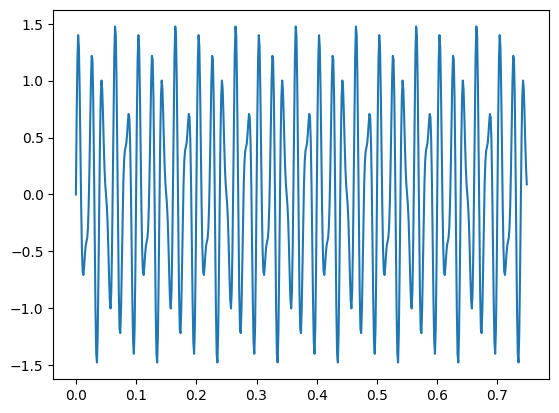

In [2]:
N = 600 # Sample points
T = 1.0 / 800.0 # Sample spacing
t = np.linspace(0.0, N*T, N, endpoint=False)
x = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(80.0 * 2.0 * np.pi * t) # 50Hz
plt.plot(t,x)
plt.show()

## Calculating the DFT

In [3]:
# Calculate the DFT using scipy.signal.fft
X = fft(x)

# Frequency values corresponding to the DFT
f = fftfreq(N, T)[:N//2]

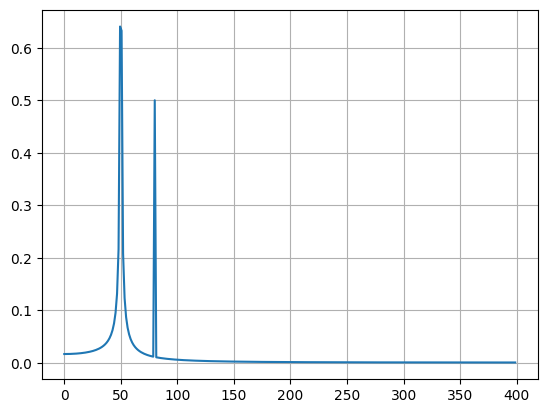

In [4]:
# Plot the DFT
plt.plot(f, 2.0/N * np.abs(X[0:N//2]))
plt.grid()
plt.show()

# Computing the inverse DFT using `ifft`

## Recovering the original signal

/home/matheus/.local/share/rtx/installs/python/3.11.4/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


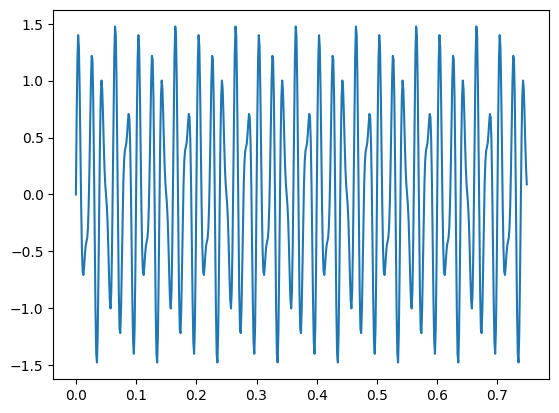

In [5]:
x = ifft(X)
plt.plot(t,x)
plt.show()

In [6]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import cv2

# Image processing fft2

## Our sample image, grayscaled

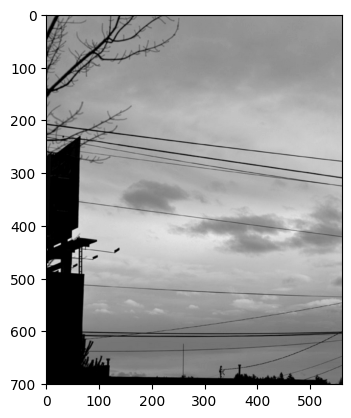

In [7]:
image = cv2.imread('./wires.png')
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_image, cmap="gray")

## Extracting information from the image

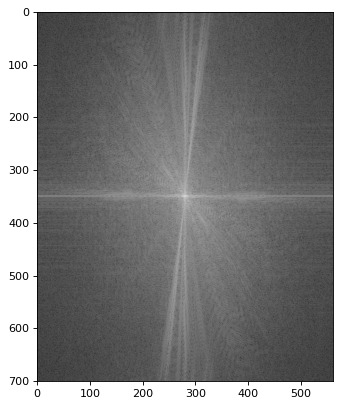

In [8]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(grayscale_image))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

In [9]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(grayscale_image, 1)

ValueError: the input array must have size 3 along `channel_axis`, got (701, 561)